In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Importing the dataset

In [2]:
df_train = pd.read_csv("/kaggle/input/titanic/train.csv")
df_test= pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print("Train shape :",df_train.shape)
print("Test shape:", df_test.shape)

Train shape : (891, 12)
Test shape: (418, 11)


## Data Preprocessing

In [5]:
df_train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Carter, Mr. William Ernest",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Columns like "PassengerId", "Name", "Ticket" may not needed for the training, so droping it on df_train, df_test

In [6]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
col = ["PassengerId","Name","Ticket"]
df_train = df_train.drop(col,axis=1)
df_test = df_test.drop(col,axis=1)

In [8]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [9]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S


## Checking for missing values in train and test data

In [10]:
df_train.isnull().sum().sort_values(ascending=False)

Cabin       687
Age         177
Embarked      2
Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
dtype: int64

In [11]:
df_train.isnull().sum().sort_values(ascending=False)

Cabin       687
Age         177
Embarked      2
Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
dtype: int64

## checking the unique values in Cabin

In [22]:
df_train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

We can see that It starts with an Alphabet, so we can use it for training

Out of 891 rows, column "Cabin" has 687 missing values in training data and test data. 
Since it is more than 50% of the data, we can change the values from NaN to some other variable and consider it as data not available

We replace it as "No cabin"


In [25]:
df_train["Cabin"].fillna("No cabin",inplace=True)
df_test["Cabin"].fillna("No cabin",inplace=True)

In [39]:
df_train['Cabin'].unique()

array(['No cabin', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C6

We have alphanumeric characters in Cabin column, So we are extracting the letter from value and replacing it

In [42]:
for i in range(0,len(df_train)):
    df_train['Cabin'][i] = df_train['Cabin'][i][:1]
for i in range(0,len(df_test)):
    df_test['Cabin'][i] = df_train['Cabin'][i][:1]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [44]:
df_train['Cabin'].unique()

array(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [45]:
df_test["Cabin"].unique()

array(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

These are the updated values in "Cabin" and 'N' represents "No cabin"

In [46]:
df_train.isnull().sum().sort_values(ascending=False)

Age         177
Embarked      2
Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
Cabin         0
dtype: int64

In [48]:
df_test.isnull().sum().sort_values(ascending=False)

Age         86
Fare         1
Pclass       0
Sex          0
SibSp        0
Parch        0
Cabin        0
Embarked     0
dtype: int64

We have missing values in "Age" columns. so, we replace the values with the mean of the respective data

In [49]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,N,S
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,N,S
3,1,1,female,35.0,1,0,53.1000,C,S
4,0,3,male,35.0,0,0,8.0500,N,S


Filling the missing values in "Age" columns using the mean value

In [52]:
df_train["Age"].fillna(df_train["Age"].mean(),inplace=True)
df_test["Age"].fillna(df_test["Age"].mean(),inplace=True)

In [53]:
df_train.isnull().sum().sort_values(ascending=False)

Embarked    2
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
dtype: int64

In [54]:
df_test.isnull().sum().sort_values(ascending=False)

Fare        1
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Cabin       0
Embarked    0
dtype: int64

Now, we have 2 missing values for "Embarked" column in train data and 1 missing value for "Fare" in test data, so we replace the missing values using their respective mean value for "Fare" and mode(Highest Occurence) for "Embarked" column

In [56]:
df_train["Embarked"].fillna(df_train["Embarked"].mode()[0],inplace=True)
df_test["Fare"].fillna(df_train["Fare"].mean(),inplace=True)

In [57]:
df_train.isnull().sum().sort_values(ascending=False)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [58]:
df_test.isnull().sum().sort_values(ascending=False)

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

The data does not have any missing values now 

## Converting Catogorical Features into Numberical features

The categorical features are Sex, Cabin, Embarked

### Sex

We create a dictionary for the corresponding Categorical features with its Numerical values

#### 0 for Male


#### 1 for Female

In [60]:
gender = {"male":0,"female":1}
gender

{'male': 0, 'female': 1}

In [65]:
df_train["Sex"]=df_train["Sex"].map(gender)
df_test["Sex"]= df_test["Sex"].map(gender)

In [66]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,7.2500,N,S
1,1,1,1,38.0,1,0,71.2833,C,C
2,1,3,1,26.0,0,0,7.9250,N,S
3,1,1,1,35.0,1,0,53.1000,C,S
4,0,3,0,35.0,0,0,8.0500,N,S


## Cabin

We create a dictionary for the corresponding Categorical features with its Numerical values

In [70]:
df_train.Cabin.unique()

array(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

We have eight cabin, so we want to map with 8 values

In [72]:
cab = {'N':0, 'C':1, 'E':2, 'G':3, 'D':4, 'A':5, 'B':6, 'F':7, 'T':8}
cab

{'N': 0, 'C': 1, 'E': 2, 'G': 3, 'D': 4, 'A': 5, 'B': 6, 'F': 7, 'T': 8}

In [73]:
df_train["Cabin"] = df_train["Cabin"].map(cab)
df_test["Cabin"] = df_test["Cabin"].map(cab)

In [74]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,7.2500,0,S
1,1,1,1,38.0,1,0,71.2833,1,C
2,1,3,1,26.0,0,0,7.9250,0,S
3,1,1,1,35.0,1,0,53.1000,1,S
4,0,3,0,35.0,0,0,8.0500,0,S


## Embarked

We create a dictionary for the corresponding Categorical features with its Numerical values

In [75]:
df_train["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

We have three values in Embarked, so we want to map with 3 values

In [76]:
emb = {'S':0, 'C':1, 'Q':2}
emb

{'S': 0, 'C': 1, 'Q': 2}

In [77]:
df_train["Embarked"] = df_train["Embarked"].map(emb)
df_test["Embarked"] = df_test["Embarked"].map(emb)

In [78]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,7.2500,0,0
1,1,1,1,38.0,1,0,71.2833,1,1
2,1,3,1,26.0,0,0,7.9250,0,0
3,1,1,1,35.0,1,0,53.1000,1,0
4,0,3,0,35.0,0,0,8.0500,0,0


In [79]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,0,34.5,0,0,7.8292,0,2
1,3,1,47.0,1,0,7.0000,1,0
2,2,0,62.0,0,0,9.6875,0,2
3,3,0,27.0,0,0,8.6625,1,0
4,3,1,22.0,1,1,12.2875,0,0


### Now, we have changed all the Categorical values into Numerical values

In [81]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    int64  
 8   Embarked  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [82]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Cabin     418 non-null    int64  
 7   Embarked  418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


# Visualization

In [83]:
import matplotlib.pyplot as plt

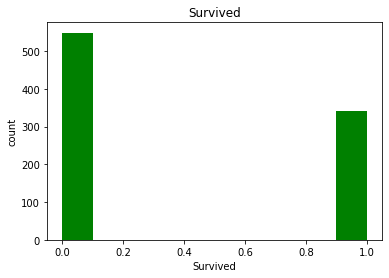

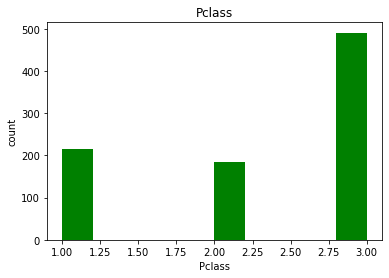

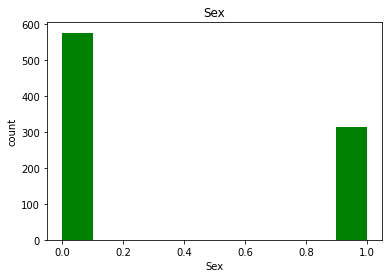

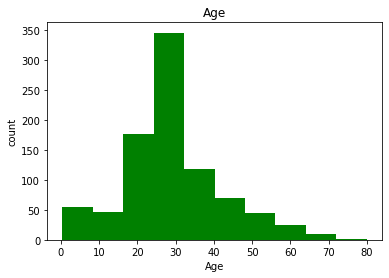

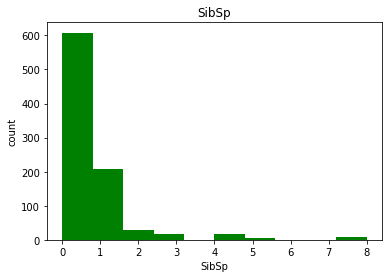

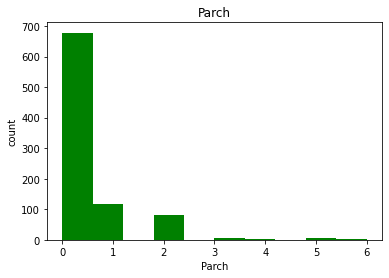

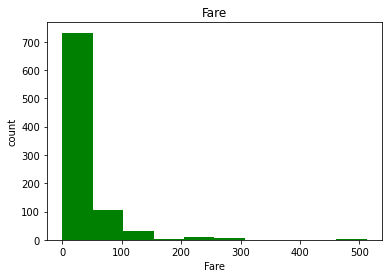

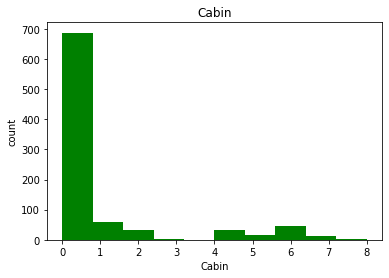

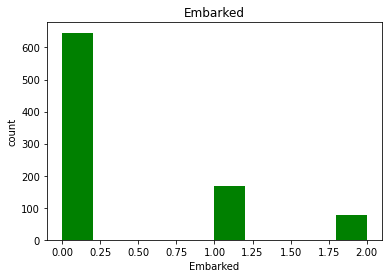

In [121]:
for i in df_train.columns:
        plt.hist(df_train[i],bins=10,color='green')
        plt.xlabel(i)
        plt.ylabel("count")
        plt.title(i)
        plt.show()

## Splitting the target variable

In [131]:
x=df_train.drop(["Survived"],1)
y = df_train["Survived"]

In [132]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,0,22.000000,1,0,7.2500,0,0
1,1,1,38.000000,1,0,71.2833,1,1
2,3,1,26.000000,0,0,7.9250,0,0
3,1,1,35.000000,1,0,53.1000,1,0
4,3,0,35.000000,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0,0
887,1,1,19.000000,0,0,30.0000,6,0
888,3,1,29.699118,1,2,23.4500,0,0
889,1,0,26.000000,0,0,30.0000,1,1


In [133]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Applying Standard Scaling

In [137]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
X = pd.DataFrame(standard_df,columns=x.columns)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.827377,-0.737695,-0.592481,0.432793,-0.473674,-0.502445,-0.447294,-0.568837
1,-1.566107,1.355574,0.638789,0.432793,-0.473674,0.786845,0.103936,1.005181
2,0.827377,1.355574,-0.284663,-0.474545,-0.473674,-0.488854,-0.447294,-0.568837
3,-1.566107,1.355574,0.407926,0.432793,-0.473674,0.420730,0.103936,-0.568837
4,0.827377,-0.737695,0.407926,-0.474545,-0.473674,-0.486337,-0.447294,-0.568837
...,...,...,...,...,...,...,...,...
886,-0.369365,-0.737695,-0.207709,-0.474545,-0.473674,-0.386671,-0.447294,-0.568837
887,-1.566107,1.355574,-0.823344,-0.474545,-0.473674,-0.044381,2.860086,-0.568837
888,0.827377,1.355574,0.000000,0.432793,2.008933,-0.176263,-0.447294,-0.568837
889,-1.566107,-0.737695,-0.284663,-0.474545,-0.473674,-0.044381,0.103936,1.005181


In [138]:
X.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,-2.031048e-16,3.162453e-16,2.562796e-16,3.456519e-16,6.716164e-17,-4.373606e-17,-1.596179e-16,-2.357511e-16
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-1.566107e+00,-7.376951e-01,-2.253155e+00,-4.745452e-01,-4.736736e-01,-6.484217e-01,-4.472945e-01,-5.688371e-01
25%,-3.693648e-01,-7.376951e-01,-5.924806e-01,-4.745452e-01,-4.736736e-01,-4.891482e-01,-4.472945e-01,-5.688371e-01
50%,8.273772e-01,-7.376951e-01,0.000000e+00,-4.745452e-01,-4.736736e-01,-3.573909e-01,-4.472945e-01,-5.688371e-01
75%,8.273772e-01,1.355574e+00,4.079260e-01,4.327934e-01,-4.736736e-01,-2.424635e-02,-4.472945e-01,1.005181e+00
max,8.273772e-01,1.355574e+00,3.870872e+00,6.784163e+00,6.974147e+00,9.667167e+00,3.962546e+00,2.579199e+00


### For test data

In [155]:
standard_df = scaler.fit_transform(x)
test = pd.DataFrame(standard_df,columns=df_test.columns)
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.827377,-0.737695,-0.592481,0.432793,-0.473674,-0.502445,-0.447294,-0.568837
1,-1.566107,1.355574,0.638789,0.432793,-0.473674,0.786845,0.103936,1.005181
2,0.827377,1.355574,-0.284663,-0.474545,-0.473674,-0.488854,-0.447294,-0.568837
3,-1.566107,1.355574,0.407926,0.432793,-0.473674,0.420730,0.103936,-0.568837
4,0.827377,-0.737695,0.407926,-0.474545,-0.473674,-0.486337,-0.447294,-0.568837
...,...,...,...,...,...,...,...,...
886,-0.369365,-0.737695,-0.207709,-0.474545,-0.473674,-0.386671,-0.447294,-0.568837
887,-1.566107,1.355574,-0.823344,-0.474545,-0.473674,-0.044381,2.860086,-0.568837
888,0.827377,1.355574,0.000000,0.432793,2.008933,-0.176263,-0.447294,-0.568837
889,-1.566107,-0.737695,-0.284663,-0.474545,-0.473674,-0.044381,0.103936,1.005181


In [156]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.827377,-0.737695,-0.592481,0.432793,-0.473674,-0.502445,-0.447294,-0.568837
1,-1.566107,1.355574,0.638789,0.432793,-0.473674,0.786845,0.103936,1.005181
2,0.827377,1.355574,-0.284663,-0.474545,-0.473674,-0.488854,-0.447294,-0.568837
3,-1.566107,1.355574,0.407926,0.432793,-0.473674,0.420730,0.103936,-0.568837
4,0.827377,-0.737695,0.407926,-0.474545,-0.473674,-0.486337,-0.447294,-0.568837
...,...,...,...,...,...,...,...,...
886,-0.369365,-0.737695,-0.207709,-0.474545,-0.473674,-0.386671,-0.447294,-0.568837
887,-1.566107,1.355574,-0.823344,-0.474545,-0.473674,-0.044381,2.860086,-0.568837
888,0.827377,1.355574,0.000000,0.432793,2.008933,-0.176263,-0.447294,-0.568837
889,-1.566107,-0.737695,-0.284663,-0.474545,-0.473674,-0.044381,0.103936,1.005181


## Splitting Train and Test data

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
x_train,x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [149]:
print("Training data:",x_train.shape)
print("Testing data:",x_test.shape)

Training data: (712, 8)
Testing data: (179, 8)


## Model Training

### Logistic regression

In [188]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [152]:
lr = LogisticRegression()
lr

LogisticRegression()

In [153]:
# Model Training
lr.fit(x_train, y_train)

LogisticRegression()

In [192]:
# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV
param = {
         'penalty':['l1','l2'],
         'C':[0.001, 0.01, 0.1, 1, 10, 20,100, 1000]
}
Lr= LogisticRegression(penalty='l1')
cv=GridSearchCV(lr,param,cv=5,n_jobs=-1)
cv.fit(x_train,y_train)
y_pred=cv.predict(x_test)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan 0.64048065        nan 0.81740372        nan 0.7907712
        nan 0.7893529         nan 0.78936275        nan 0.78936275
        nan 0.78936275        nan 0.78936275]
  category=UserWarning


In [181]:
cv.best_score_

0.8174037230375258

In [193]:
print("Accuracy score:",accuracy_score(y_test,y_pred))

Accuracy score: 0.8212290502793296


### XGBOOST Classifier

In [182]:
from xgboost import XGBClassifier

xgb = XGBClassifier(booster = 'gbtree', gamma=5,learning_rate = 0.1, max_depth = 5, n_estimators = 100,colsample_bytree=1)
xgb.fit(x_train, y_train)

[14:32:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [226]:
y_pred = xgb.predict(x_test)
print("Accuracy on test data:",accuracy_score(y_test,y_pred))
print("Accuracy on train data:",accuracy_score(y_train,xgb.predict(x_train)))

Accuracy on test data: 0.8324022346368715
Accuracy on train data: 0.8441011235955056


## Gradient Boosting

In [217]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(max_depth=3)
gbc.fit(x_train, y_train)

GradientBoostingClassifier(subsample=0.9)

In [225]:
print("Accuracy on test data:",accuracy_score(y_test,gbc.predict(x_test)))
print("Accuracy on train data:", accuracy_score(y_train,gbc.predict(x_train)))

Accuracy on test data: 0.8491620111731844
Accuracy on train data: 0.901685393258427


## Final Predictions

In [228]:
fin = gbc.predict(test)

In [229]:
fin

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [230]:
predictions = pd.DataFrame(fin)

In [234]:
predcsv = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
predcsv["Survived"] = predictions
predcsv.to_csv("Final prediction.csv",index=False)